In [1]:
# https://www.data.go.kr/dataset/15012005/fileData.do

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import matplotlib as mpl
import matplotlib.font_manager as fm
mpl.rcParams['axes.unicode_minus']= False
path = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname = path, size = 50).get_name()
plt.rc('font', family=font_name)

In [55]:
df = pd.read_csv('./data/상가업소정보_201912_01.csv',sep = '|')
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
1,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
2,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
3,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


##### 베스킨라빈스와 던킨도너츠의 입점정보를 시각화하여 비교

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 573680 entries, 0 to 573679
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     573680 non-null  int64  
 1   상호명        573679 non-null  object 
 2   지점명        76674 non-null   object 
 3   상권업종대분류코드  573680 non-null  object 
 4   상권업종대분류명   573680 non-null  object 
 5   상권업종중분류코드  573680 non-null  object 
 6   상권업종중분류명   573680 non-null  object 
 7   상권업종소분류코드  573680 non-null  object 
 8   상권업종소분류명   573680 non-null  object 
 9   표준산업분류코드   539290 non-null  object 
 10  표준산업분류명    539290 non-null  object 
 11  시도코드       573680 non-null  int64  
 12  시도명        573680 non-null  object 
 13  시군구코드      573680 non-null  int64  
 14  시군구명       573680 non-null  object 
 15  행정동코드      573680 non-null  int64  
 16  행정동명       573680 non-null  object 
 17  법정동코드      573680 non-null  int64  
 18  법정동명       573680 non-null  object 
 19  지번코드       573680 non-n

In [27]:
col = df.isnull().sum()[df.isnull().sum().sort_values() < 1000].index
col

Index(['상가업소번호', '상호명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드', '상권업종중분류명',
       '상권업종소분류코드', '상권업종소분류명', '시도코드', '시도명', '시군구코드', '시군구명', '행정동코드',
       '행정동명', '법정동코드', '법정동명', '지번코드', '대지구분코드', '대지구분명', '지번본번지', '지번주소',
       '도로명코드', '도로명', '건물본번지', '건물관리번호', '도로명주소', '구우편번호', '신우편번호', '경도',
       '위도'],
      dtype='object')

In [32]:
df = df[col]

In [56]:
df = df['상호명 상권업종대분류명 상권업종중분류명 상권업종소분류명 시도명 시군구명 행정동명 법정동명 도로명주소 경도 위도'.split(' ')].copy()

In [57]:
df.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
3,싱싱커피&토스트,음식,패스트푸드,토스트전문,부산광역시,사상구,괘법동,괘법동,부산광역시 사상구 괘감로 37,128.980455,35.159774
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249


##### 서울에 있는 베스킨라빈스와 던킨도너츠 상호만 모두가져오기

In [90]:
df1 = df[(df.시도명 =='서울특별시') & (df.상호명.str.lower().str.contains('(베|배)스킨라빈스|baskin|던킨도너츠|dokin'))]

In [92]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 76 to 569825
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       648 non-null    object 
 1   상권업종대분류명  648 non-null    object 
 2   상권업종중분류명  648 non-null    object 
 3   상권업종소분류명  648 non-null    object 
 4   시도명       648 non-null    object 
 5   시군구명      648 non-null    object 
 6   행정동명      648 non-null    object 
 7   법정동명      648 non-null    object 
 8   도로명주소     648 non-null    object 
 9   경도        648 non-null    float64
 10  위도        648 non-null    float64
dtypes: float64(2), object(9)
memory usage: 60.8+ KB


##### 상호명을 단순화해서 브랜드명이라는 칼럼을 생성

In [125]:
df_b = df1[df1.상호명.str.lower().str.contains('(베|배)스킨라빈스|baskin')]
df_b['브랜드명'] = '배스킨라빈스'
df_b.head()

C:\Users\TJ\ananconda3\lib\site-packages\pandas\core\strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)
<ipython-input-125-e258251750c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['브랜드명'] = '배스킨라빈스'


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,배스킨라빈스
11060,베스킨라빈스은행나무점,음식,패스트푸드,아이스크림판매,서울특별시,금천구,시흥5동,시흥동,서울특별시 금천구 금하로 726-1,126.910405,37.450433,배스킨라빈스
13953,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 390,127.028565,37.497832,배스킨라빈스
14201,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,광진구,광장동,광장동,서울특별시 광진구 아차산로 494,127.096667,37.541145,배스킨라빈스


In [126]:
df_d = df1[df1.상호명.str.contains('던킨도너츠|dokin')]
df_d['브랜드명'] = '던킨도너츠'
df_d.head()

<ipython-input-126-d5f582edebb6>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_d['브랜드명'] = '던킨도너츠'


,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
1167,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서대문구,신촌동,대현동,서울특별시 서대문구 이화여대길 56,126.945369,37.559263,던킨도너츠
1819,던킨도너츠테크노마트점,음식,패스트푸드,도너츠전문,서울특별시,광진구,구의3동,구의동,서울특별시 광진구 광나루로56길 85,127.095681,37.535713,던킨도너츠
2305,던킨도너츠창동하나로,음식,패스트푸드,도너츠전문,서울특별시,도봉구,창4동,창동,서울특별시 도봉구 마들로11길 20,127.050818,37.655101,던킨도너츠
2342,던킨도너츠용산민자역사2호,음식,패스트푸드,도너츠전문,서울특별시,용산구,한강로동,한강로3가,서울특별시 용산구 한강대로21나길 7,126.963223,37.527903,던킨도너츠
3007,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,송파구,잠실본동,잠실동,서울특별시 송파구 석촌호수로 118,127.090005,37.507431,던킨도너츠


In [127]:
df2 = pd.concat([df_b,df_d])
df2.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,배스킨라빈스
11060,베스킨라빈스은행나무점,음식,패스트푸드,아이스크림판매,서울특별시,금천구,시흥5동,시흥동,서울특별시 금천구 금하로 726-1,126.910405,37.450433,배스킨라빈스
13953,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 390,127.028565,37.497832,배스킨라빈스
14201,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,광진구,광장동,광장동,서울특별시 광진구 아차산로 494,127.096667,37.541145,배스킨라빈스


In [130]:
df1.loc[df1.상호명.str.lower().str.contains('(베|배)스킨라빈스|baskin')]   # 베스킨만 select되는거 아닌가? 그상태서 브랜드명 col추가하면 상관없나?

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,배스킨라빈스
11060,베스킨라빈스은행나무점,음식,패스트푸드,아이스크림판매,서울특별시,금천구,시흥5동,시흥동,서울특별시 금천구 금하로 726-1,126.910405,37.450433,배스킨라빈스
13953,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 390,127.028565,37.497832,배스킨라빈스
14201,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,광진구,광장동,광장동,서울특별시 광진구 아차산로 494,127.096667,37.541145,배스킨라빈스
...,...,...,...,...,...,...,...,...,...,...,...,...
557464,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,은평구,진관동,진관동,서울특별시 은평구 진관2로 77,126.926589,37.634321,배스킨라빈스
557822,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,서초구,방배4동,방배동,서울특별시 서초구 방배로 200,126.991649,37.491305,배스킨라빈스
558006,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,동작구,대방동,대방동,서울특별시 동작구 알마타길 6,126.924959,37.509801,배스킨라빈스
561929,배스킨라빈스31,음식,패스트푸드,아이스크림판매,서울특별시,송파구,문정2동,문정동,서울특별시 송파구 송파대로 111,127.124872,37.479617,배스킨라빈스


##### 소매, 생활서비스로 분류된 업종제거

In [137]:
df2[~df2.상권업종대분류명.isin(['소매','생활서비스'])]    # ~ : not

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도,브랜드명
76,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,관악구,청룡동,봉천동,서울특별시 관악구 관악로 161,126.952166,37.479599,배스킨라빈스
2164,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,마포구,서교동,서교동,서울특별시 마포구 와우산로 88,126.923809,37.552104,배스킨라빈스
11060,베스킨라빈스은행나무점,음식,패스트푸드,아이스크림판매,서울특별시,금천구,시흥5동,시흥동,서울특별시 금천구 금하로 726-1,126.910405,37.450433,배스킨라빈스
13953,배스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 강남대로 390,127.028565,37.497832,배스킨라빈스
14201,베스킨라빈스,음식,패스트푸드,아이스크림판매,서울특별시,광진구,광장동,광장동,서울특별시 광진구 아차산로 494,127.096667,37.541145,배스킨라빈스
...,...,...,...,...,...,...,...,...,...,...,...,...
526208,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,중랑구,상봉1동,상봉동,서울특별시 중랑구 망우로55길 11-10,127.092738,37.599278,던킨도너츠
553907,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,서초구,반포3동,잠원동,서울특별시 서초구 잠원로 37-48,127.006169,37.510071,던킨도너츠
554211,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,동대문구,휘경2동,휘경동,서울특별시 동대문구 망우로 82,127.063537,37.586201,던킨도너츠
560984,던킨도너츠,음식,패스트푸드,도너츠전문,서울특별시,성동구,행당1동,행당동,서울특별시 성동구 왕십리광장로 17,127.038379,37.561436,던킨도너츠


##### 시각화를 통한 배스킨,던킨 비교

In [138]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 648 entries, 76 to 569825
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   상호명       648 non-null    object 
 1   상권업종대분류명  648 non-null    object 
 2   상권업종중분류명  648 non-null    object 
 3   상권업종소분류명  648 non-null    object 
 4   시도명       648 non-null    object 
 5   시군구명      648 non-null    object 
 6   행정동명      648 non-null    object 
 7   법정동명      648 non-null    object 
 8   도로명주소     648 non-null    object 
 9   경도        648 non-null    float64
 10  위도        648 non-null    float64
 11  브랜드명      648 non-null    object 
dtypes: float64(2), object(10)
memory usage: 65.8+ KB


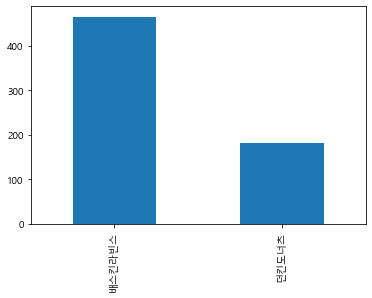

In [144]:
df2.브랜드명.value_counts().plot(kind='bar')

##### 시군구명으로 각각 몇개의 매장이 있는지 chart로 표현

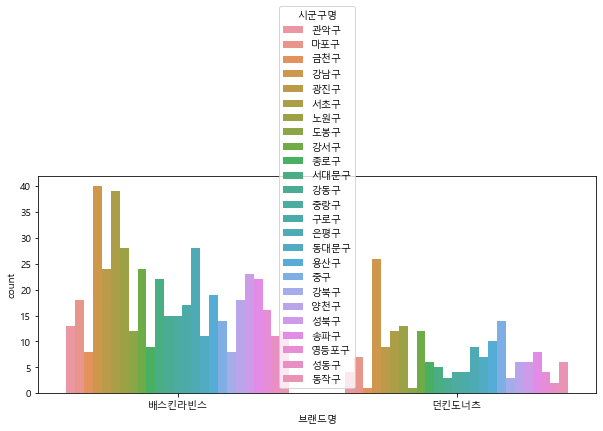

In [149]:
plt.figure(figsize = (10,4))
sns.countplot(data=df2,x='브랜드명', hue = '시군구명')

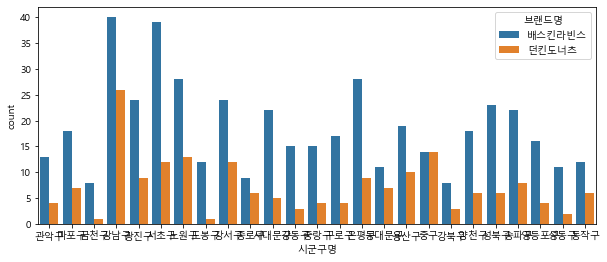

In [150]:
plt.figure(figsize = (10,4))
sns.countplot(data=df2,x='시군구명', hue = '브랜드명')

### scatterplot

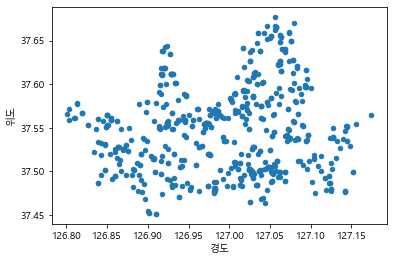

In [160]:
df2.plot(kind='scatter',x='경도',y='위도')

AttributeError: module 'seaborn' has no attribute 'valuesplot'

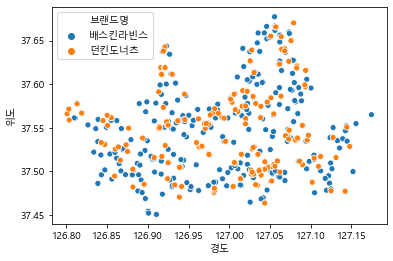

In [164]:
sns.scatterplot(data=df2, x='경도',y='위도',hue= '브랜드명')

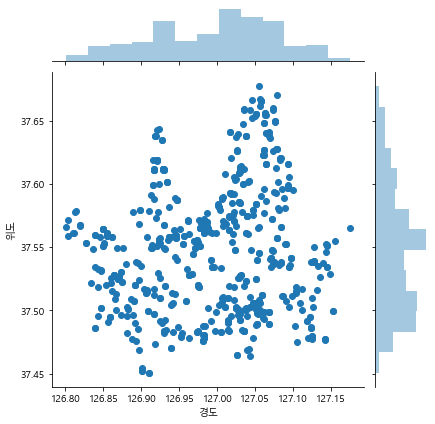

In [162]:
sns.jointplot(data=df2,x='경도',y='위도')

### folium 통해 지도에 표시

In [165]:
import folium

In [166]:
lat = df2.위도.mean()
long = df2.경도.mean()

In [176]:
m = folium.Map([lat,long], zoom_start = 11)

In [175]:
folium.Marker([37.5,127],tooltip = '던킨도너츠').add_to(m)
m

In [185]:
from folium.plugins import MarkerCluster

m = folium.Map([lat,long], zoom_start = 12)
Marker_cluster = MarkerCluster().add_to(m)
for i in df2.index:
    sub_lat = df2.loc[i,'위도']
    sub_long = df2.loc[i,'경도']
    title= df2.loc[i,'상호명']
    
    #상호별 색 별도지정
    if title =='던킨도너츠':
        icon_color = 'red'
    else :
        icon_color = 'blue'
    
    folium.Marker([sub_lat,sub_long],tooltip = title,icon=folium.Icon(color=icon_color)).add_to(Marker_cluster)    
m
    

##### 파리바게트, 뚜레쥬르 시각화비교

In [189]:
df_s = df[df.시도명 == '서울특별시']

In [190]:
df_s.head()

,상호명,상권업종대분류명,상권업종중분류명,상권업종소분류명,시도명,시군구명,행정동명,법정동명,도로명주소,경도,위도
0,와라와라호프,음식,유흥주점,호프/맥주,서울특별시,강남구,대치1동,대치동,서울특별시 강남구 남부순환로 2933,127.061026,37.493922
1,커피빈코리아선릉로93길점,음식,커피점/카페,커피전문점/카페/다방,서울특별시,강남구,역삼1동,역삼동,서울특별시 강남구 선릉로93길 6,127.047883,37.505675
2,프로포즈,음식,유흥주점,호프/맥주,서울특별시,금천구,독산3동,독산동,서울특별시 금천구 가산로 34-6,126.899220,37.471711
4,가락사우나내스낵,생활서비스,대중목욕탕/휴게,사우나/증기탕/온천,서울특별시,송파구,석촌동,석촌동,서울특별시 송파구 가락로 71,127.104071,37.500249
5,초밥왕,음식,일식/수산물,음식점-초밥전문,서울특별시,송파구,잠실6동,신천동,서울특별시 송파구 올림픽로 293-19,127.102490,37.515149


In [269]:
df_11 = df_s[df_s.상호명.str.lower().str.contains('파리바(게|개)(트|뜨)|parisba|뚜(레|래)쥬르|touslesjours')]

In [270]:
df_11.loc[df_11.상호명.str.lower().str.contains('파리바(게|개)(트|뜨)|parisba'),'브랜드명'] = '파리바게트'

In [277]:
df_11.브랜드명.fillna('뚜레쥬르',inplace = True)
df_11 = df_11[df_11.상권업종소분류명!='학원-제과기술'].copy()

C:\Users\TJ\ananconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [266]:
df_11[df_11.브랜드명=='파리바게트'].상호명.unique()

array(['파리바게뜨길동사거리점', '파리바게뜨상계제일점', '파리바게뜨-판매옥수점', '파리바게뜨당고개점',
       '파리바게뜨목동오거리점', '파리바게뜨', '파리바게뜨서강신수점', '파리바게뜨수유중앙점', '파리바게뜨가락중앙점',
       '파리바게뜨종로구기', '파리바게뜨외대점', '신목파리바게뜨', '강동경희파리바게뜨', '파리바게트',
       '카페약수파리바게트', '파리바게뜨가좌역점', '파리바게뜨영등포구청점', '파리바게뜨수락리버시티',
       '파리바게뜨방학중앙점', '파리바게뜨중계2호점', '파리바게뜨중앙대점', '파리바게뜨장안현대점', '파리바게뜨성북점',
       '파리바게뜨마장대로점', '파리바게뜨문정역점', '파리바게뜨종로시그니처점', '파리바게뜨상계보람점',
       '파리바게뜨성동세무서점', '파리바게뜨여의경도점', '파리바게뜨구로제일점', '파리바게뜨카페대학로점',
       '파리바게뜨대림역점', '파리바게뜨월계미성', '파리바게뜨금천한양점', '파리바게뜨휘경점', '파리바게뜨역',
       '파리바게트은평뉴타운', '파리바게트상도건영', '파리바게뜨망우중앙', '파리바게뜨군자역점', '파리바게뜨당산포스빌',
       '파리크라상파리바게뜨신분당', '파리바게뜨난곡점', '파리크라상파리바게뜨카페', '파리바게뜨쌍문사거리',
       '파리바게뜨카페하월곡동일점', '길음역파리바게뜨', '파리바게트종암사거리', '파리바게뜨까페', '파리바게뜨구로고대',
       '파리바게뜨평창점', '파리바게트2011년', '파리바게뜨신분당선', '파리바게뜨사러가', '회기역파리바게뜨',
       '파리바게뜨동대문구청점', '파리바게뜨올림픽승리점', '파리바게뜨도봉점', '파리바게뜨동교삼거리점',
       '파리바게뜨카페당산동행복점', '파리바게뜨묵동삼거리점', '파리바게뜨자양2호점', '파리바게뜨사당신동아점',
       '파리바게뜨불광역점', '파리바게뜨낙성대역점', '파리바게뜨북가좌점', 

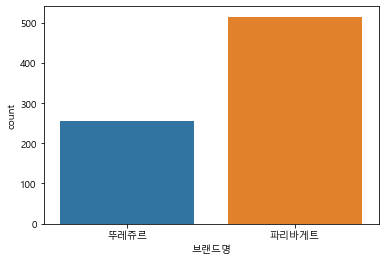

In [278]:
sns.countplot(data = df_11,x = '브랜드명')

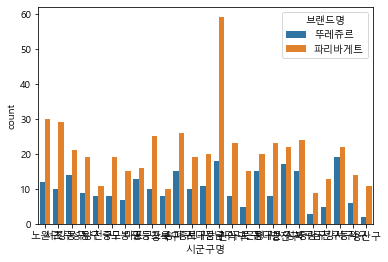

In [279]:
sns.countplot(data=df_11,x='시군구명',hue='브랜드명')

In [282]:
lat = df_11.위도.mean()
long = df_11.경도.mean()

m = folium.Map([lat,long], zoom_start = 12)

for i in df_11.index:
    sub_lat = df_11.loc[i,'위도']
    sub_long = df_11.loc[i,'경도']
    title= df_11.loc[i,'브랜드명']
    
    #상호별 색 별도지정
    if title =='파리바게트':
        icon_color = 'red'
    else :
        icon_color = 'blue'
    
    folium.Marker([sub_lat,sub_long],tooltip = title,icon=folium.Icon(color=icon_color)).add_to(m)    
m
    

In [285]:
lat = df_11.위도.mean()
long = df_11.경도.mean()
from folium.plugins import MarkerCluster

m = folium.Map([lat,long], zoom_start = 12, titles ='stamen toner')
Marker_cluster = MarkerCluster().add_to(m)
for i in df_11.index:
    sub_lat = df_11.loc[i,'위도']
    sub_long = df_11.loc[i,'경도']
    title= df_11.loc[i,'브랜드명']
    
    #상호별 색 별도지정
    if title =='파리바게트':
        icon_color = 'red'
    else :
        icon_color = 'blue'
    
    folium.Marker([sub_lat,sub_long],tooltip = title,icon=folium.Icon(color=icon_color)).add_to(Marker_cluster)    
m
    